<a href="https://colab.research.google.com/github/alegbeleye/Numpy-Linear-Regression/blob/main/LinearRegressionNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 50

In [3]:
np.random.seed(SEED)

In [4]:
#function to generate sythetic data
def generate_data(num_samples):
  """Generate dummy data for linear regression"""
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,20, size=num_samples)
  y= 3.5 * X + random_noise #add some noise
  return X, y

##### Try to convert it to a table with x and y columns

In [5]:
#Generate random linear data
X, y = generate_data(num_samples=NUM_SAMPLES)
X, y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([ -4.25441649,  12.16326313,  10.13183217,  24.06075751,
         27.39927424,  15.67777816,  19.29392765,  38.55616533,
         46.74418061,  47.77797904,  35.7345181 ,  43.52985377,
         52.50388806,  56.88106081,  50.10752264,  59.33588558,
         61.09249496,  49.91305349,  76.18479865,  82.97923572,
         70.94657952,  81.96188535,  69.26143725,  81.56472018,
        101.99420306,  97.0413443 ,  92.91607733, 108.16190429,
         97.50508367, 108.54295958, 121.07382169, 111.58520272,
        126.06442926, 109.81300474, 130.12782913, 133.63743925,
        122.56376317, 147.24602886, 136.26422266, 153.77947877,
        131.79427668, 139.02861251, 138.42065836, 160.74642831,
        161.8387434 , 163.49930489, 152.29972188, 171.3429924 ,
      

In [6]:
np.vstack([X, y]).T[:5]

array([[ 0.        , -4.25441649],
       [ 1.        , 12.16326313],
       [ 2.        , 10.13183217],
       [ 3.        , 24.06075751],
       [ 4.        , 27.39927424]])

In [7]:
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [8]:
df = pd.DataFrame(data, columns=["X", "y"])
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


In [9]:
X = df[["X"]].values
y = df[["y"]].values
X,y

(array([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.]]),
 array([[ -4.25441649],
        [ 12.16326313],
        [ 10.13183217],
        [ 24.06075751],
        [ 27.39927424],
        [ 15.67777816],
        [ 19.29392765],
        [ 38.55616533],
        [ 46.74418061],
        [ 47.77797904],
        

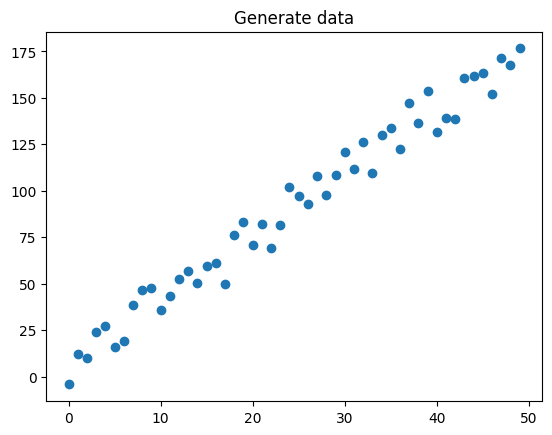

In [10]:
plt.title("Generate data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

### Linear Regression with just Numpy

####Split Data

In [11]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [12]:
#shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [13]:
# split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [14]:
# Split data
X_train = X[train_start: train_end]
y_train = y[train_start: train_end]
X_val = X[val_start: val_end]
y_val = y[val_start: val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


####Standardize Data

*** We want to standardize our data (`zero mean` and `unit variance`) so a specific feature's magnitude doesn't affect how the model learns its `weights`. ***

basically we dont want a specific feature to dominate our models decision

formula :`(inputs - mean of inputs) / standard deviation of inputs`

In [15]:
# create a standardize function

def standardize_data(data, mean, std):
  return (data - mean)/std

In [16]:
# Determine the means and std
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

We need to treat the validation and test sets as if they were hidden datasets. So we only use the train set to determine the mean and std to avoid biasing our training process.

In [17]:
# standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)


In [18]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


##### WEIGHTS

In [19]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [20]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


##### Model

In [21]:
#Feed inputs into the model to receive the predictions
# Forward pass [NX1] · [1X1] = [NX1]

y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


##### LOSS

Compare the predictions
 with the actual target values
 using the objective (cost) function to determine the loss
. A common objective function for linear regression is mean squared error (MSE). This function calculates the difference between the predicted and target values and squares it.
N = `len(y_train)`
MSE formula = `1(np.sum((y_train - y_pred)**2)/N`


In [22]:
# loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print(f"loss: {loss:.2f}")

loss: 0.99


##### Gradients

In [23]:
# back propagation
# we would use this later to adjust the weights accordingly
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

##### Update Weights

In [24]:
LEARNING_RATE = 1e-1

In [25]:
# update the weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

##### Training

repeat steps from "Model" to "Update Weights"

In [26]:
NUM_EPOCHS = 100

In [27]:
# initialize random Weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))

for epoch in range(NUM_EPOCHS):
  # forward pass
  y_pred = np.dot(X_train, W) + b

  #calculate loss
  N = len(y_train)
  loss = (1/N) * (np.sum((y_train - y_pred)**2))

  # print out loss
  if(epoch % 10 == 0):
    print(f"epoch: {epoch}, loss: {loss:.3f}")

  # back propagation
  dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
  db = -(2/N) * np.sum((y_train - y_pred) * 1)

  ## Update the weights
  W += -LEARNING_RATE * dW
  b += -LEARNING_RATE * db


epoch: 0, loss: 0.990
epoch: 10, loss: 0.039
epoch: 20, loss: 0.028
epoch: 30, loss: 0.028
epoch: 40, loss: 0.028
epoch: 50, loss: 0.028
epoch: 60, loss: 0.028
epoch: 70, loss: 0.028
epoch: 80, loss: 0.028
epoch: 90, loss: 0.028


##### Evaluation

In [28]:
# predictions
pred_train = W*X_train +b
pred_test = W*X_test + b

In [29]:
#Train and test MSE

train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test)**2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


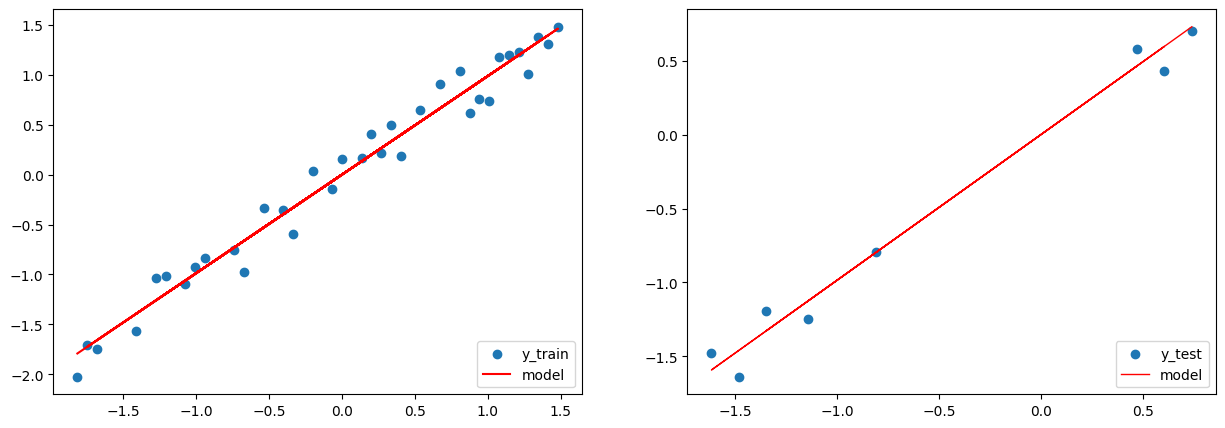

In [33]:
# figure size
plt.figure(figsize=(15, 5))

# plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linestyle="-", label="model")
plt.legend(loc="lower right")

#plot testing data
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")


#Show plots
plt.show()
